In [16]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

1.

In [17]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [18]:
samples = gen_quant.sample(data={'M':4}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

df = samples.draws_pd()
df.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,lambd,y_sim[1],y_sim[2],y_sim[3],y_sim[4]
0,0.0,0.0,200.2480,193.0,190.0,193.0,196.0
1,0.0,0.0,160.4380,178.0,161.0,163.0,165.0
2,0.0,0.0,111.3390,114.0,113.0,89.0,93.0
3,0.0,0.0,26.3166,17.0,27.0,21.0,25.0
4,0.0,0.0,32.1309,30.0,45.0,38.0,33.0


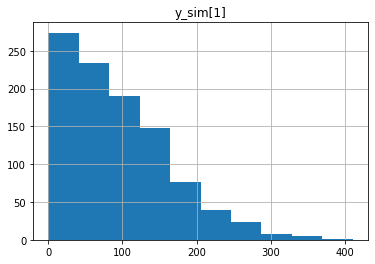

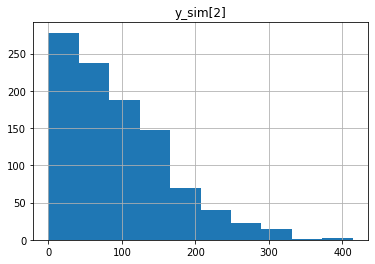

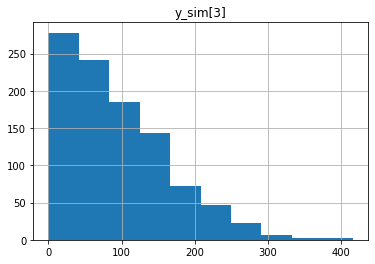

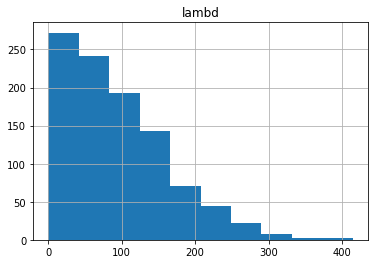

In [19]:
for i in range(1, 4):
    df[f"y_sim[{i}]"].hist()
    plt.title(f"y_sim[{i}]")
    plt.show()

df["lambd"].hist()
plt.title("lambd")
plt.show()

2.

In [20]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,2]})

INFO:cmdstanpy:compiling stan file /home/Lab2/code_2.stan to exe file /home/Lab2/code_2
ERROR:cmdstanpy:Stan program failed to compile:
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/Lab2/code_2.hpp /home/Lab2/code_2.stan
Warning in '/home/Lab2/code_2.stan', line 3, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Semantic error in '/home/Lab2/code_2.stan', line 12, column 4 to column 25:
   -------------------------------------------------
    10:  model{
    11:      theta ~ beta(1,1);
    12:      y ~ bernoulli(theta);
             ^
    13:  }
   -------------------------------------------------

Ill-typed arguments to '~' statement. No distribution 'bernoulli' was found with the correct signature.
make: *** [make/program:50: /home/Lab2/code_2.hpp] Error 1

Command

ValueError: Unable to compile Stan model file: /home/Lab2/code_2.stan.

In [21]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,2]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/Lab2/code_3.stan', line 3, column 4 to column 31)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/Lab2/code_3.stan', line 3, column 4 to column 31)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/Lab2/code_3.stan', line 3, column 4 to column 31)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/Lab2/code_3.stan', line 3, column 4 to column 31)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/Lab2/code_3', 'id=1', 'random', 'seed=68959', 'data', 'file=/tmp/tmpcm4qk9jh/xslud9fu.json', 'output', 'file=/tmp/tmpcm4qk9jh/code_3-20230322201951_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpcm4qk9jh/code_3-20230322201951_1.csv
 console_msgs (if any):
	/tmp/tmpcm4qk9jh/code_3-20230322201951_0-stdout.txt

In [ ]:
# Error occurs as constraints are violated

3.

In [22]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▏         | 00:00 Status


chain 1 |█▉        | 00:00 Iteration: 1100 / 7000 [ 15%]  (Sampling)
chain 1 |██▉       | 00:00 Iteration: 1800 / 7000 [ 25%]  (Sampling)

chain 1 |███▌      | 00:00 Iteration: 2300 / 7000 [ 32%]  (Sampling)
chain 1 |████▏     | 00:01 Iteration: 2700 / 7000 [ 38%]  (Sampling)


chain 1 |████▌     | 00:01 Iteration: 3000 / 7000 [ 42%]  (Sampling)
chain 1 |█████     | 00:01 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 1 |█████▍    | 00:01 Iteration: 3600 / 7000 [ 51%]  (Sampling)



chain 1 |█████▊    | 00:01 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 4200 / 7000 [ 60%]  (Sampling)


chain 1 |██████▋   | 00:02 Iteration: 4500 / 7000 [ 64%]  (Sampling)


chain 1 |███████   | 00:02 Iteration: 4800 / 7000 [ 68%]  (Sampling)


chain 1 |███████▌  | 00:02 Iteration: 5100 / 7000 [ 72%]  (


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Lab2/samples/code_4-20230322202051_1.csv, /home/Lab2/samples/code_4-20230322202051_2.csv, /home/Lab2/samples/code_4-20230322202051_3.csv, /home/Lab2/samples/code_4-20230322202051_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

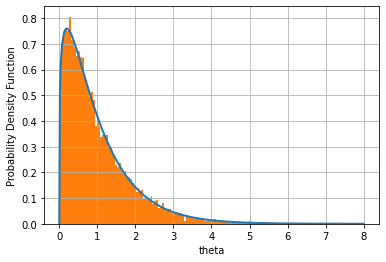

In [23]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins
out_gamma1.draws_pd()["theta"].hist(bins=160, density=True)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▏         | 00:00 Status
chain 1 |█▉        | 00:00 Iteration: 1100 / 7000 [ 15%]  (Sampling)


chain 1 |██▊       | 00:00 Iteration: 1700 / 7000 [ 24%]  (Sampling)


chain 1 |███▎      | 00:00 Iteration: 2100 / 7000 [ 30%]  (Sampling)

chain 1 |███▊      | 00:01 Iteration: 2400 / 7000 [ 34%]  (Sampling)


chain 1 |████▏     | 00:01 Iteration: 2700 / 7000 [ 38%]  (Sampling)


chain 1 |████▌     | 00:01 Iteration: 3000 / 7000 [ 42%]  (Sampling)




chain 1 |████▊     | 00:01 Iteration: 3200 / 7000 [ 45%]  (Sampling)
chain 1 |█████▏    | 00:01 Iteration: 3400 / 7000 [ 48%]  (Sampling)


chain 1 |█████▍    | 00:01 Iteration: 3600 / 7000 [ 51%]  (Sampling)


chain 1 |█████▋    | 00:01 Iteration: 3800 / 7000 [ 54%]  (Sampling)




chain 1 |█████▉    | 00:02 Iteration: 4000 / 7000 [ 57%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 4200 / 7000 [ 


INFO:cmdstanpy:CmdStan done processing.


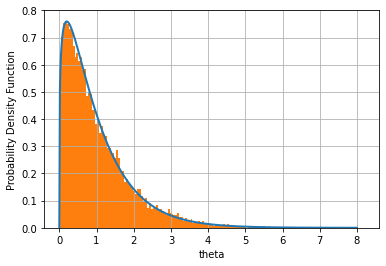

In [24]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins
out_gamma2.draws_pd()["theta"].hist(bins=160, density=True)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

4.

In [25]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 4 # number of letters in the first name
L = 9 # number of letters in the last name
y0 = .21# initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:compiling stan file /home/Lab2/code_6.stan to exe file /home/Lab2/code_6
INFO:cmdstanpy:compiled model executable: /home/Lab2/code_6
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/Lab2/code_6.hpp /home/Lab2/code_6.stan
Warning in '/home/Lab2/code_6.stan', line 2, column 46: Declaration of arrays
    by placing brackets after a type is deprecated and will be removed in
    Stan 2.32.0. Instead use the array keyword before the type. This can be
    changed automatically using the auto-format flag to stanc
Warning in '/home/Lab2/code_6.stan', line 2, column 58: Declaration of arrays
    by placing brackets after a type is deprecated and will be removed in
    Stan 2.32.0. Instead use the array keyword before the type. This can be
    changed automatically using the auto-format flag to stanc
Warning in '/home/Lab2/code_6.stan', line 16, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.52346


5.

In [27]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 11012000#integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


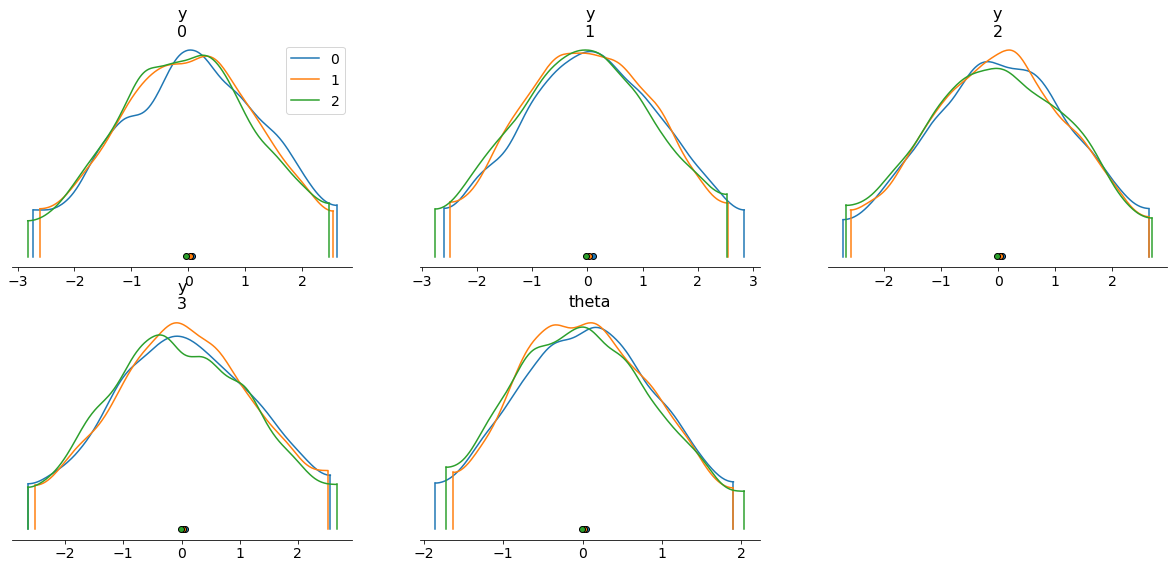

In [28]:
az.plot_density([result_1,result_2,result_3])
plt.show()

6.

INFO:cmdstanpy:compiling stan file /home/Lab2/code_10.stan to exe file /home/Lab2/code_10
INFO:cmdstanpy:compiled model executable: /home/Lab2/code_10
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/Lab2/code_10.hpp /home/Lab2/code_10.stan
Warning in '/home/Lab2/code_10.stan', line 6, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DB

array([[<AxesSubplot:title={'center':'mean_y'}>]], dtype=object)

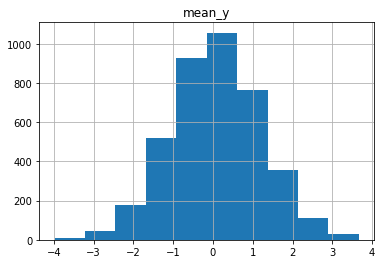

In [29]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)
# investigate the output and plot histogram of mean_y variable
df = mean_of_y.draws_pd()
df.hist()